# SLR Practice

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

import sklearn.metrics as metrics

import statsmodels.api as sm

from statsmodels.stats.stattools import durbin_watson


### Get the data

In [2]:
df = pd.read_csv('./data/train.csv')

I always fix my column names first. 

In [3]:
# list comp!

df.columns = [name.strip().lower() for name in df.columns]


In [4]:
# Check it out

df.head()


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

I'll create an SLR using one feature and `saleprice` as the target.

In [6]:
# Create target/output and features/input

X = df[['grlivarea']]
y= df.saleprice



In [7]:
# X, D, T = n x m 

# capital X,D,T = feature matrix

# y, z, g = vector

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
X.head()

,grlivarea
0,1710
1,1262
2,1786
3,1717
4,2198


In [10]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: saleprice, dtype: int64

### Assumption: Linear Relationship between feature and target

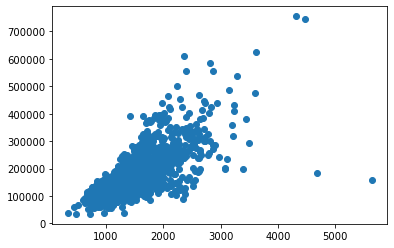

In [11]:
# Assumption #1. Check to see if there is a linear relationship

plt.scatter(X,y)


<AxesSubplot:xlabel='grlivarea', ylabel='saleprice'>

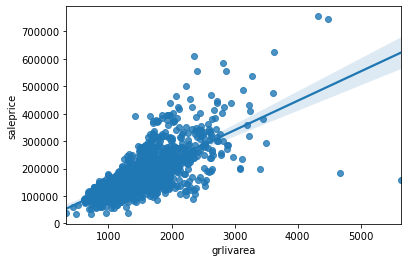

In [12]:
# another method sns.regplot
sns.regplot(x=X, y=y)

In [13]:
# Create a correct number of bins, and let's look at the distribution

bins = int( len(X)**.5)
bins

## get the number of bins by using the square root of the integer, using the entire length of X

38

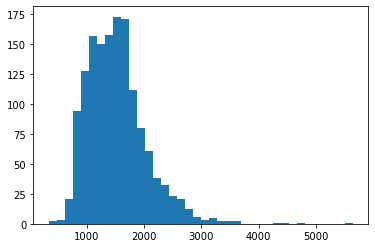

In [14]:
plt.hist(X['grlivarea'], bins=bins);

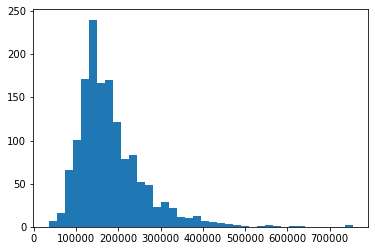

In [15]:
# And for Sale price, as well
plt.hist(y, bins=bins);

In [16]:
tot_df = df[['grlivarea', 'saleprice']]

In [17]:
tot_df.head()

,grlivarea,saleprice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


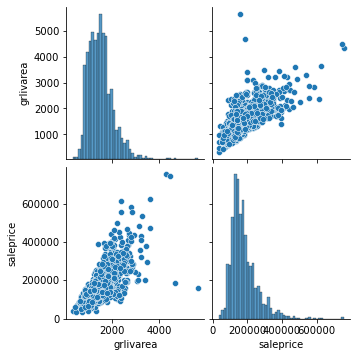

In [18]:
sns.pairplot(tot_df)

What does this tell us?

In [19]:
# statsmodel first

sm_lr = sm.OLS(y, sm.add_constant(X))

# above creates a linear regression object
# adding a constant, adds a column for a constant


In [20]:
# Summary
sm_lr.fit().summary()

# .fit method computation for: The results including an estimate of covariance matrix, (whitened)
# residuals and an estimate of scale. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          4.52e-223
Time:                        11:45:45   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
grlivarea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### How do we compare this?

Baseline!

There's a [class](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) for it!

In [21]:
# Instantiate

dummy_lr = DummyRegressor()


In [22]:
# fit

dummy_lr.fit(X,y)


DummyRegressor()

In [23]:
# score

dummy_lr.score(X,y)


0.0

Well that's a relief. We're at least better then that.

### Error assumptions

#### Normally Distributed with a mean of 0

In [24]:
# Instantiate
    
sk_lr = LinearRegression()


In [25]:
# fit

sk_lr.fit(X,y)


LinearRegression()

In [26]:
# score

sk_lr.score(X,y)


0.5021486502718042

In [27]:
# predict

preds = sk_lr.predict(X)


In [28]:
preds

array([201761.93968805, 153767.53887136, 209903.84696945, ...,
       269254.06583652, 134055.55282165, 153124.75671756])

In [29]:
# calculate residuals

resids = y - preds
resids

0        6738.060312
1       27732.461129
2       13596.153031
3      -62511.852201
4       -4041.554863
            ...     
1455   -20012.727073
1456   -30650.259993
1457    -2754.065837
1458     8069.447178
1459    -5624.756718
Name: saleprice, Length: 1460, dtype: float64

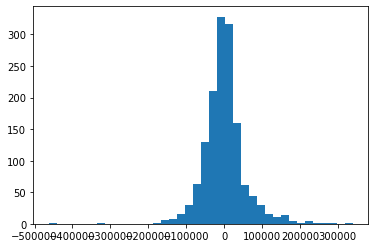

In [30]:
# Histogram of residuals

plt.hist(resids, bins=bins);

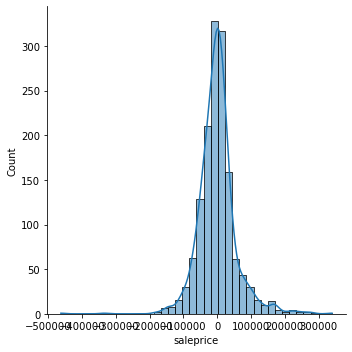

In [31]:
# sns

sns.displot(resids, bins=bins, kde=True)


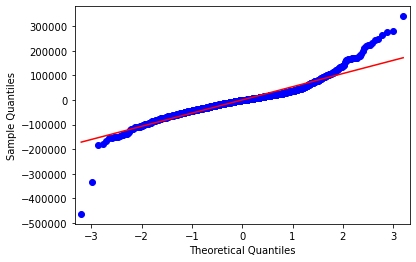

In [32]:
# QQ!

sm.qqplot(resids, line='r');


#### Thoughts?

#### Heteroskedacity

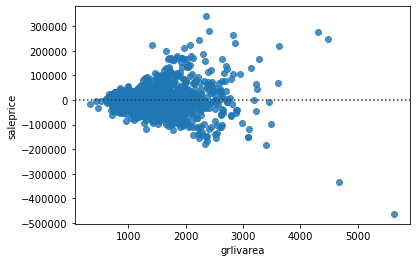

In [33]:
# resid plot sns.resid

sns.residplot(x=X, y=y);


In [34]:
## above plot of residuals is hetroskedastic

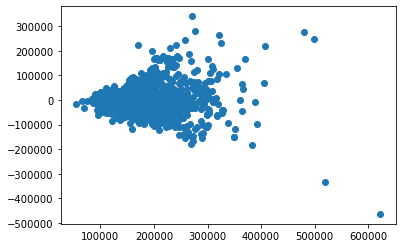

In [35]:
# scatter

plt.scatter(preds, resids)


#### Thoughts?

#### No autocorrelation in residuals

Hello, [Durbin-Watson!](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic)

In [36]:
print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(resids)
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.02465177084623
Little to no autocorrelation 

Assumption satisfied


The above code was audaciously stolen from [this](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/) excellent article.

#### Thoughts?

## Your turn!

Your goal is find a feature or an interaction of features that outperforms this model. GO!

In [40]:
df.corr()['saleprice']

id              -0.021917
mssubclass      -0.084284
lotfrontage      0.351799
lotarea          0.263843
overallqual      0.790982
overallcond     -0.077856
yearbuilt        0.522897
yearremodadd     0.507101
masvnrarea       0.477493
bsmtfinsf1       0.386420
bsmtfinsf2      -0.011378
bsmtunfsf        0.214479
totalbsmtsf      0.613581
1stflrsf         0.605852
2ndflrsf         0.319334
lowqualfinsf    -0.025606
grlivarea        0.708624
bsmtfullbath     0.227122
bsmthalfbath    -0.016844
fullbath         0.560664
halfbath         0.284108
bedroomabvgr     0.168213
kitchenabvgr    -0.135907
totrmsabvgrd     0.533723
fireplaces       0.466929
garageyrblt      0.486362
garagecars       0.640409
garagearea       0.623431
wooddecksf       0.324413
openporchsf      0.315856
enclosedporch   -0.128578
3ssnporch        0.044584
screenporch      0.111447
poolarea         0.092404
miscval         -0.021190
mosold           0.046432
yrsold          -0.028923
saleprice        1.000000
Name: salepr

In [45]:
X_1 = df[['1stflrsf']]
y= df.saleprice

<AxesSubplot:xlabel='1stflrsf', ylabel='saleprice'>

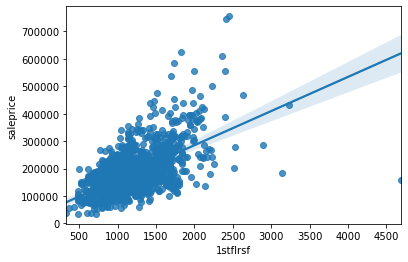

In [46]:
sns.regplot(x=X_1, y=y)

In [63]:
tot_df2 = df[['1stflrsf', 'saleprice']]

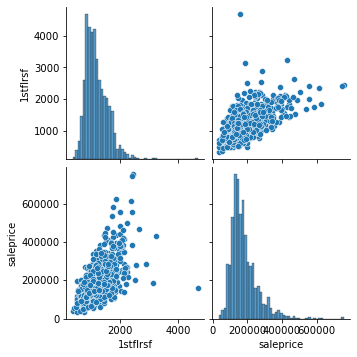

In [64]:
sns.pairplot(tot_df2)

In [47]:
sm_lr2 = sm.OLS(y, sm.add_constant(X_1))

In [48]:
sm_lr2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     845.5
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          5.39e-147
Time:                        11:49:25   Log-Likelihood:                -18210.
No. Observations:                1460   AIC:                         3.642e+04
Df Residuals:                    1458   BIC:                         3.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.617e+04   5245.728      6.896      0.000    2.59e+04    4.65e+04
1stflrsf     124.5006      4.282     29.078      0.000     116.102     132.899
==============================================================================
Omnibus:                      373.497   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2669.199
Skew:                           0.997   Prob(JB):                         0.00
Kurtosis:                       9.317   Cond. No.                     3.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
sk_lr2 = LinearRegression()

In [51]:
sk_lr2.fit(X_1,y)

LinearRegression()

In [52]:
sk_lr.score(X_1,y)

0.13336133943199346

In [53]:
preds2 = sk_lr.predict(X_1)

In [54]:
preds2

array([110272.61313123, 153767.53887136, 117128.95610505, ...,
       145839.89230789, 134055.55282165, 153124.75671756])

In [55]:
resids2 = y - preds2
resids2

0        98227.386869
1        27732.461129
2       106371.043895
3        18478.699177
4       108766.713128
            ...      
1455     54335.742049
1456    -30650.259993
1457    120660.107692
1458      8069.447178
1459     -5624.756718
Name: saleprice, Length: 1460, dtype: float64

In [56]:
bins = int( len(X_1)**.5)
bins

38

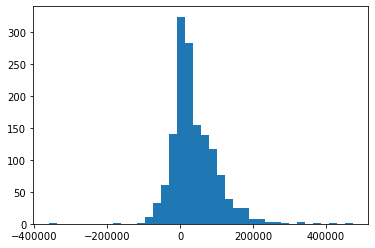

In [57]:
plt.hist(resids2, bins=bins);

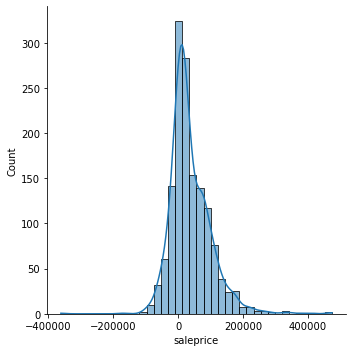

In [58]:
sns.displot(resids2, bins=bins, kde=True)

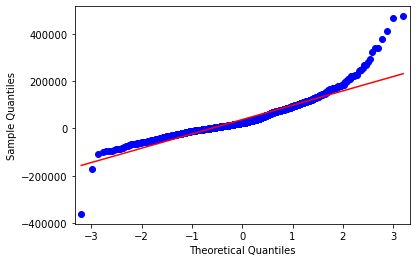

In [59]:
sm.qqplot(resids2, line='r');

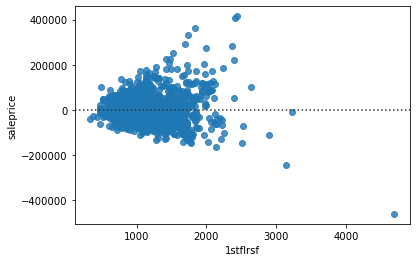

In [60]:
sns.residplot(x=X_1, y=y);

In [61]:
print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(resids2)
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.4461067835799224
Signs of positive autocorrelation 

Assumption not satisfied
